# Кольца Ньютона

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import seaborn as sns
import pint

plt.style.use('default')
u = pint.UnitRegistry()

### Радиусы темных и светлых колец

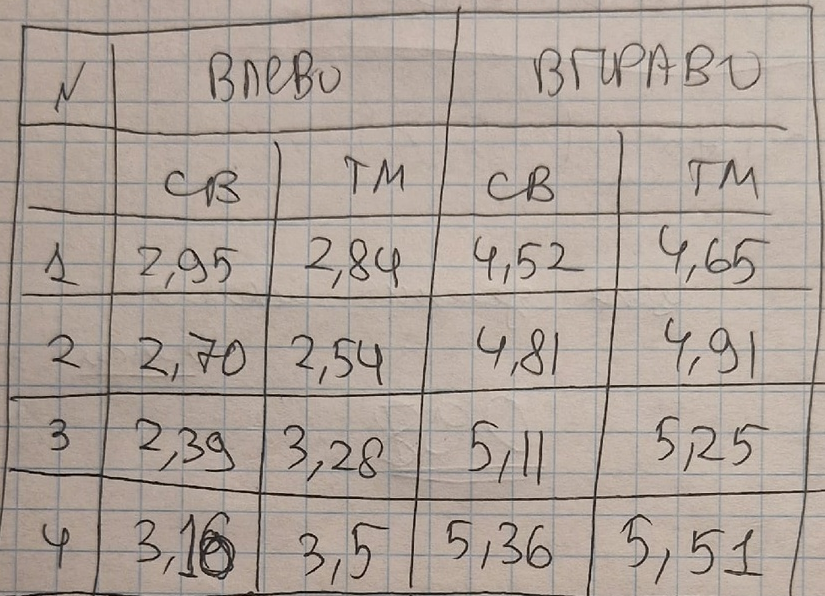

In [2]:
ringsYellow = pd.DataFrame({
    'Light_l1': [2.95, 2.70, 2.39, 3.16],
    'Dark_l1': [2.84, 2.54, 3.28, 3.5],
    'Light_l2': [4.52, 4.81, 5.11, 5.36],
    'Dark_l2': [4.65, 4.91, 5.25, 5.51]
})

cost = 10 #цена деления шкалы

In [3]:
ringsYellow

,Light_l1,Dark_l1,Light_l2,Dark_l2
0,2.95,2.84,4.52,4.65
1,2.70,2.54,4.81,4.91
2,2.39,3.28,5.11,5.25
3,3.16,3.50,5.36,5.51


Зависимость квадрата радиуса от порядка максимума

In [41]:
LightRadiusSq = sorted(np.power((ringsYellow.Light_l1.to_numpy() * cost - ringsYellow.Light_l2.to_numpy() * cost)/2, 2))
DarkRadiusSq = sorted(np.power((ringsYellow.Dark_l1.to_numpy() * cost - ringsYellow.Dark_l2.to_numpy() * cost)/2, 2))
mLight = np.arange(len(DarkRadiusSq)) + 1
mDark = np.arange(len(DarkRadiusSq))
print(LightRadiusSq)

[61.62249999999997, 111.30249999999994, 121.0, 184.95999999999998]


МНК

In [50]:
MNKLight = linregress(mLight, LightRadiusSq)

xAxes = np.linspace(0, 5, 1000)

yLight = MNKLight.slope * xAxes + MNKLight.intercept
yLightError_Down = (MNKLight.slope + MNKLight.stderr) * xAxes + MNKLight.intercept + MNKLight.intercept_stderr

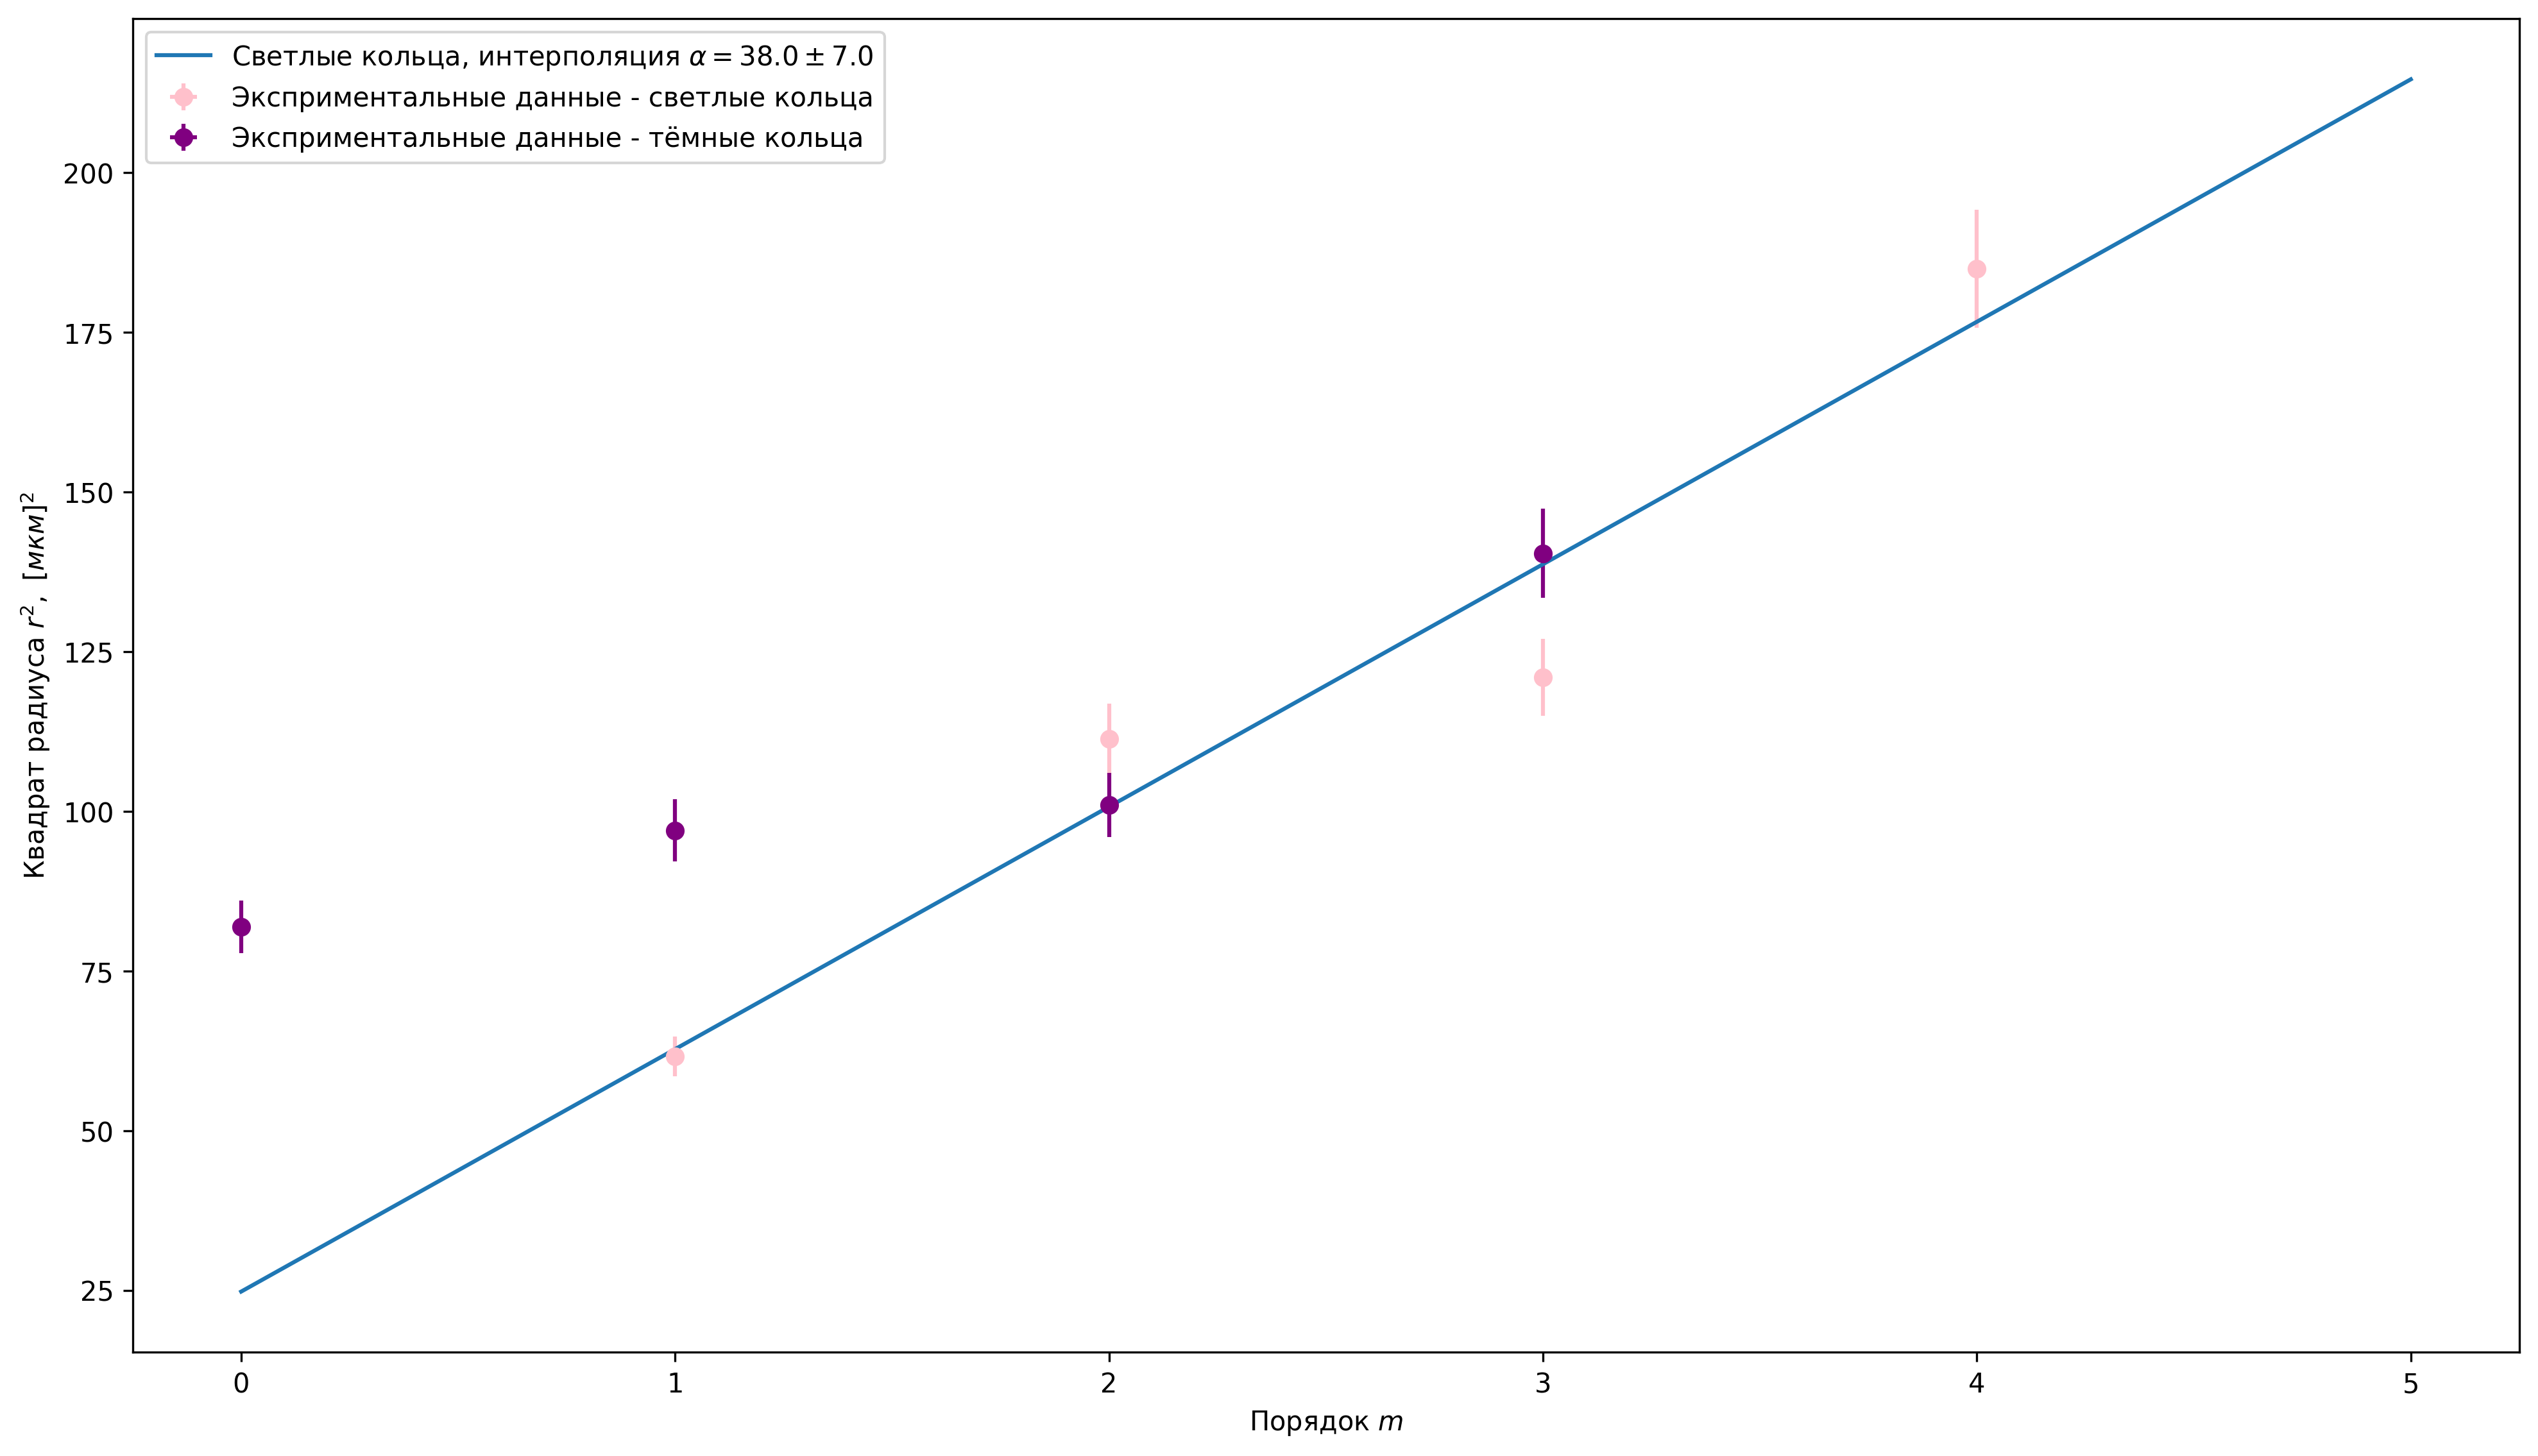

In [52]:
fig, ax = plt.subplots(figsize = (16,9), dpi = 300)

plt.errorbar(x = mLight,
             y = LightRadiusSq,
             xerr = [0 for _ in mLight],
             yerr = [0.05 * radSq for radSq in LightRadiusSq],
             fmt = 'o',
             label = "Эксприментальные данные - светлые кольца",
             color = 'pink')
plt.errorbar(x = mDark,
             y = DarkRadiusSq,
             xerr = [0 for _ in mDark],
             yerr = [0.05 * radSq for radSq in DarkRadiusSq],
             fmt = 'o',
             label = "Эксприментальные данные - тёмные кольца",
             color = 'purple')
plt.plot(xAxes,
        yLight,
        label = r"Светлые кольца, интерполяция $\alpha = {} \pm {}$".format(round(MNKLight.slope,0),
                                                                            round(MNKLight.stderr,0)))

plt.xlabel(r"Порядок $m$")
plt.ylabel(r"Квадрат радиуса $r^{2}, \ [мкм]^{2}$")
plt.legend();

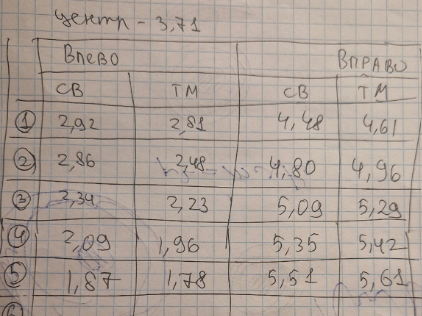

In [4]:
ringsYellow = pd.DataFrame({
    'Light_l1': [2.92, 2.86, 2.34, 2.09, 1.87],
    'Dark_l1': [2.81, 2.48, 2.23, 1.96, 1.78],
    'Light_l2': [4.48, 4.80, 5.09, 5.35, 5.51],
    'Dark_l2': [4.61, 4.96, 5.29, 5.42, 5.61]
})


In [79]:
ringsYellow

,Light_l1,Dark_l1,Light_l2,Dark_l2
0,2.92,2.81,4.48,4.61
1,2.86,2.48,4.80,4.96
2,2.34,2.23,5.09,5.29
3,2.09,1.96,5.35,5.42
4,1.87,1.78,5.51,5.61


In [27]:
LightRadiusSq = np.array(
    sorted(np.power(
    (ringsYellow.Light_l1.to_numpy() * cost - ringsYellow.Light_l2.to_numpy() * cost)/2, 
    2)))

DarkRadiusSq = np.array(
    sorted(np.power((ringsYellow.Dark_l1.to_numpy() * cost - ringsYellow.Dark_l2.to_numpy() * cost)/2, 
            2)))

mLight = np.arange(len(LightRadiusSq)) + 1
mDark = np.arange(len(DarkRadiusSq)) + 1
print("Квадрат радиуса светлых колец: " + str(LightRadiusSq/100))
print("Квадрат радиуса тёмных колец: " + str(DarkRadiusSq/100))

Квадрат радиуса светлых колец: [0.6084   0.9409   1.890625 2.6569   3.3124  ]
Квадрат радиуса тёмных колец: [0.81     1.5376   2.3409   2.9929   3.667225]


In [33]:
MNKLight = linregress(mLight, LightRadiusSq)

xAxes = np.linspace(-0.2, 7, 1000)

yLight = MNKLight.slope * xAxes + MNKLight.intercept
yLightError_Down = (MNKLight.slope + MNKLight.stderr) * xAxes + MNKLight.intercept + MNKLight.intercept_stderr

MNKDark = linregress(mDark, DarkRadiusSq)

yDark = MNKDark.slope * xAxes + MNKDark.intercept
yDarkError_Down = (MNKDark.slope + MNKDark.stderr) * xAxes + MNKDark.intercept + MNKDark.intercept_stderr

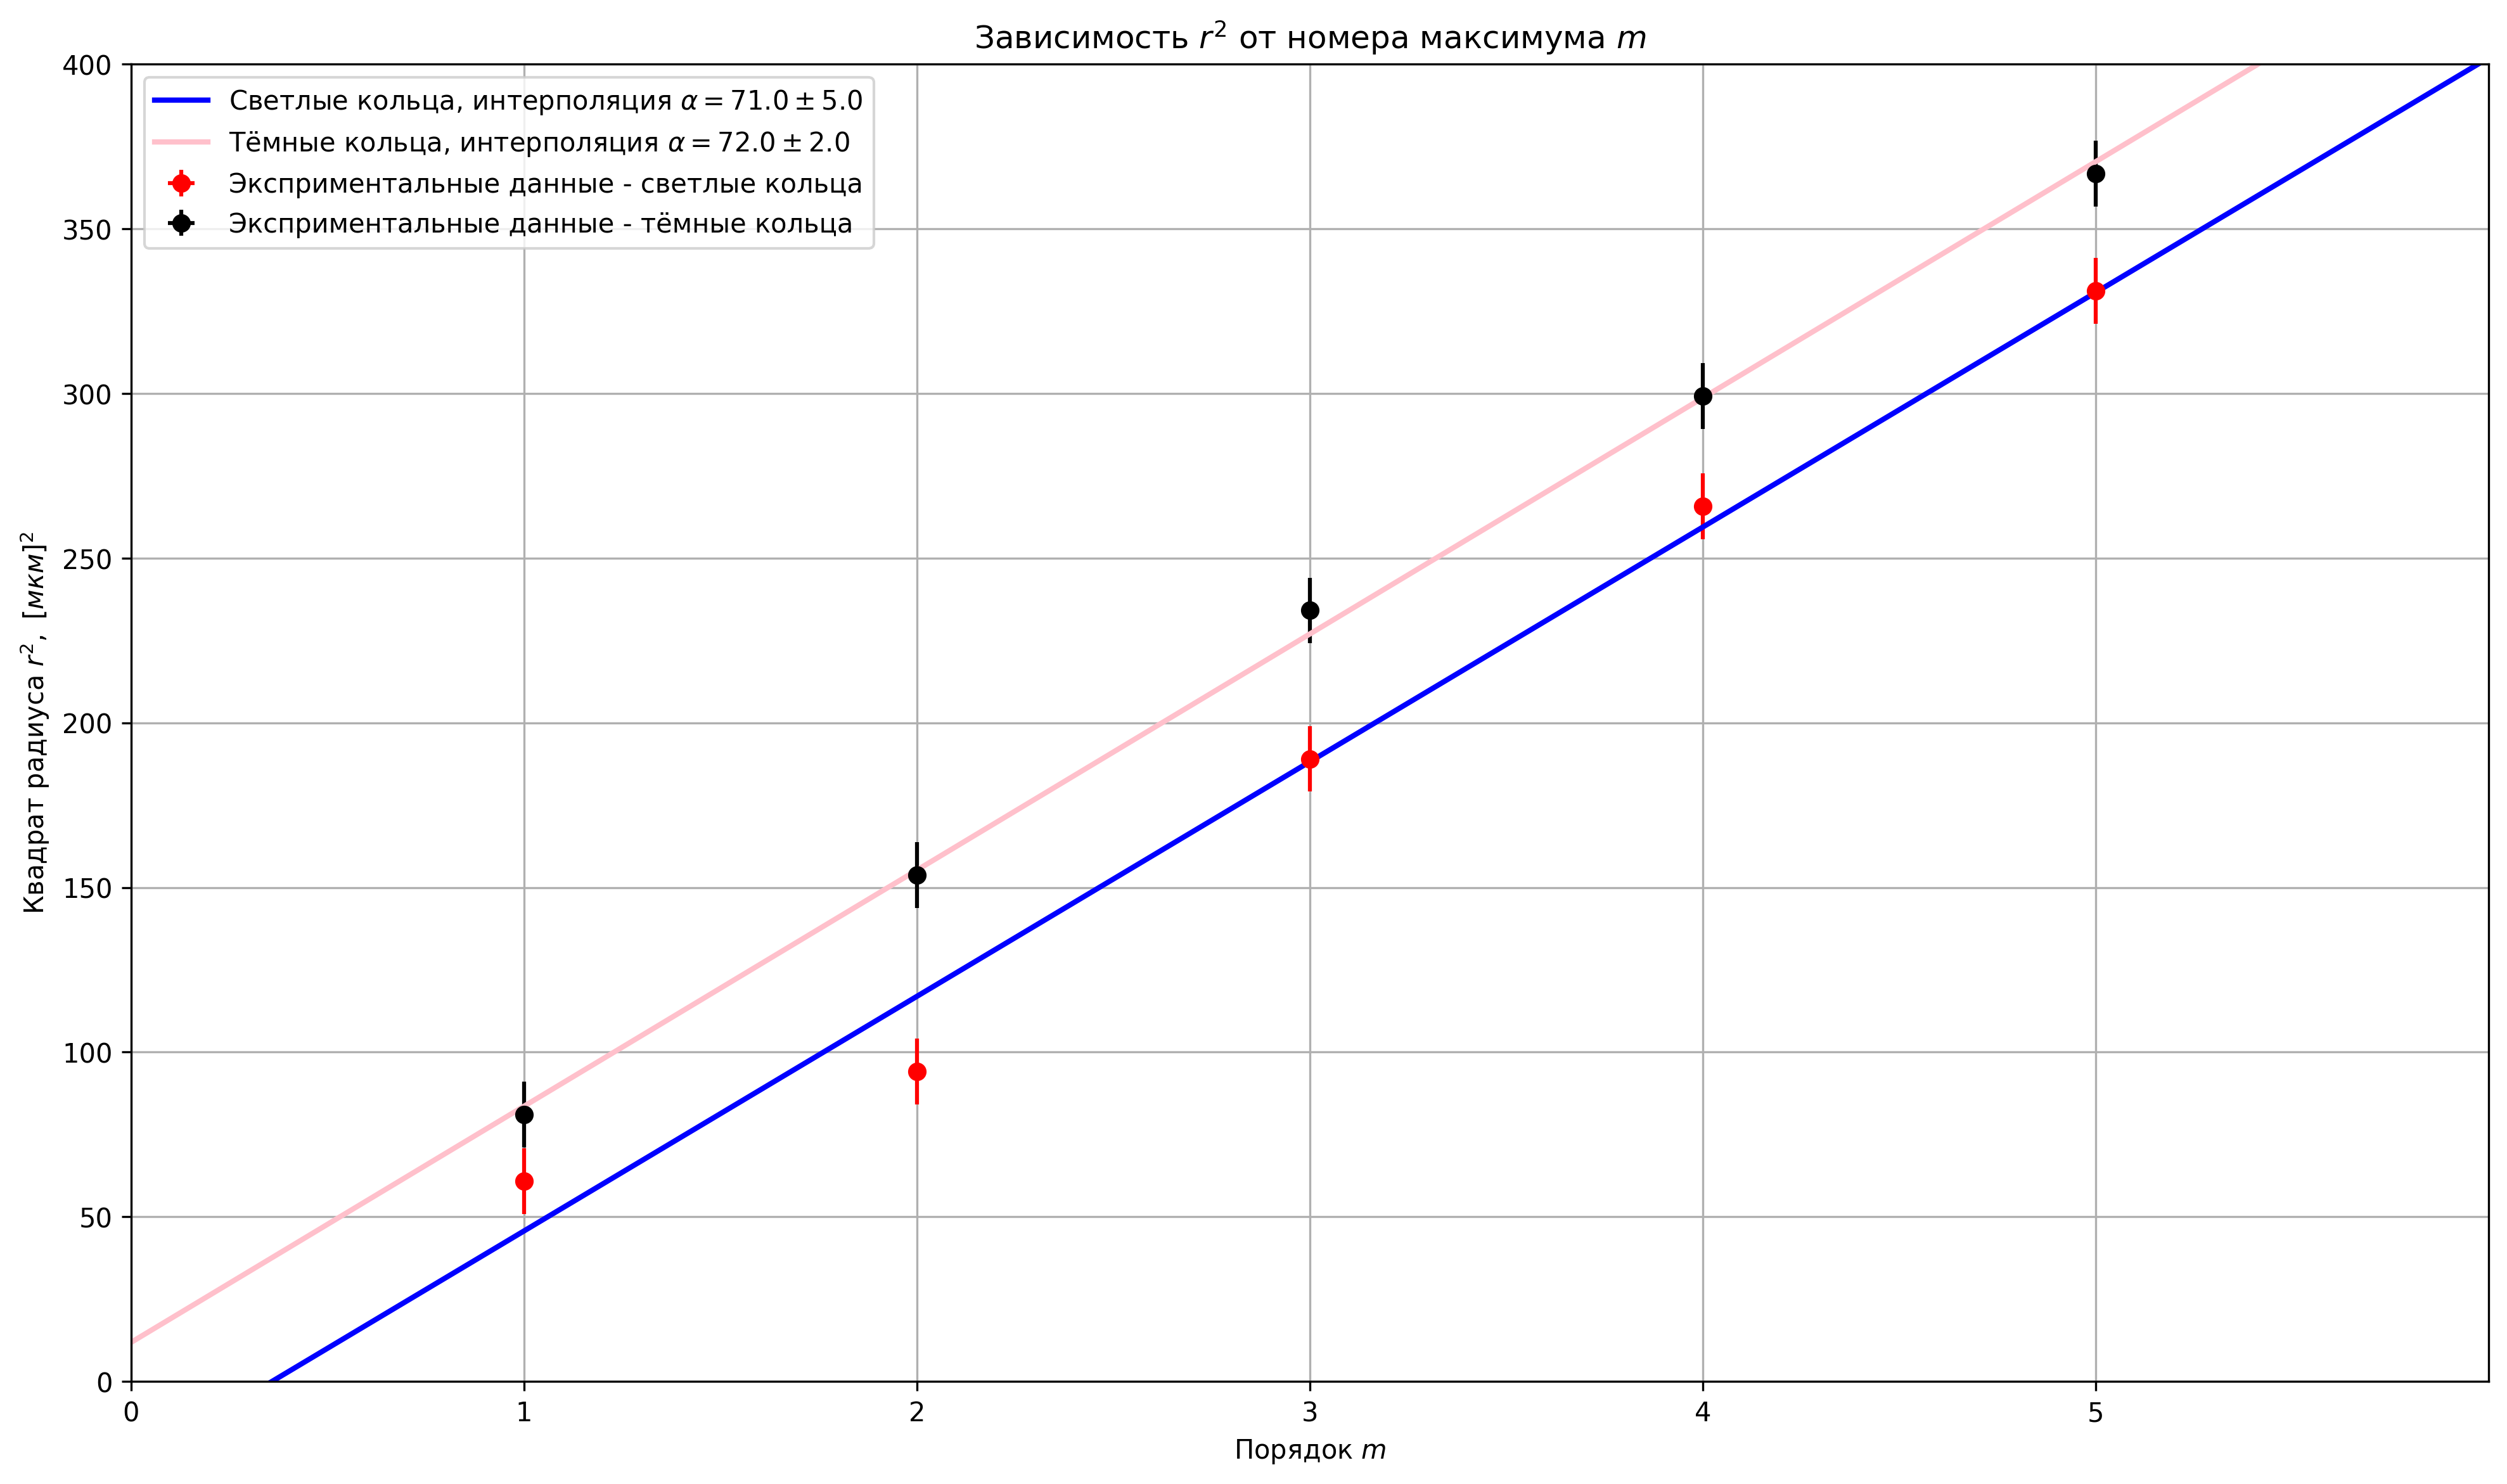

In [34]:
fig, ax = plt.subplots(figsize = (16,9), dpi = 300)

plt.errorbar(x = mLight,
             y = LightRadiusSq,
             xerr = [0 for _ in mLight],
             yerr = [cost for radSq in LightRadiusSq],
             fmt = 'o',
             label = "Эксприментальные данные - светлые кольца",
             color = 'red')

plt.errorbar(x = mDark,
             y = DarkRadiusSq,
             xerr = [0 for _ in mDark],
             yerr = [cost for radSq in DarkRadiusSq],
             fmt = 'o',
             label = "Эксприментальные данные - тёмные кольца",
             color = 'black')

plt.plot(xAxes,
         yLight,
         label = r"Светлые кольца, интерполяция $\alpha = {} \pm {}$".format(round(MNKLight.slope,0),
                                                                            round(MNKLight.stderr,0)),
         color = 'blue',
         linewidth = 2)

plt.plot(xAxes,
         yDark,
         label = r"Тёмные кольца, интерполяция $\alpha = {} \pm {}$".format(round(MNKDark.slope,0),
                                                                            round(MNKDark.stderr,0)),
         color = 'pink',
         linewidth = 2)


plt.xlabel(r"Порядок $m$")
plt.ylabel(r"Квадрат радиуса $r^{2}, \ [мкм]^{2}$")
plt.legend()
plt.xlim(0,6)
plt.ylim(0,400)
plt.xticks(np.arange(6))
plt.yticks(np.arange(0,450,50))
plt.title("Зависимость $r^{2}$ от номера максимума $m$")
plt.grid()

### Нахождение радиуса кривизны линзы

In [45]:
lamb = 546 * np.power(0.1, 9)
alpha = MNKLight.slope * np.power(np.power(0.1, 6), 2)
alpha_Error = MNKLight.stderr * np.power(np.power(0.1, 6), 2)

linsRad = alpha / lamb
linsRad_Error = alpha_Error * linsRad / alpha

print(f"Радиус кривизны линзы = {round(linsRad * 10000, 1)} +/- {round(linsRad_Error * 10000, 1)} сантиметров")

Радиус кривизны линзы = 1.3 +/- 0.1 сантиметров
